In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import scipy.stats as sts

# 1. 数据处理

## 平均值、标准差

In [2]:
# 为了输入方便，我省略了小数点，所以需要除以 K0
data = pd.read_csv('data_liyh.csv')
describe_data = data.describe()
describe_data

,data
count,210.00000
mean,3.01019
std,0.09833
min,2.72000
25%,2.94000
50%,3.00000
75%,3.07000
max,3.32000


In [3]:
mu = describe_data.iloc[1, 0]
sigma = describe_data.iloc[2, 0]
# 测量列的均值、标注差
print("均值：{:.4f}，标准差：{:.4f}".format(mu, sigma))

均值：3.0102，标准差：0.0983


## 极差、步长、区间个数

In [4]:
rhs = data.max().values[0]
lhs = data.min().values[0]
R = rhs - lhs
print("极差：{:.4f}".format(R))

极差：0.6000


In [5]:
K = 11
print("取 K = ", K)

取 K =  11


In [6]:
rel_freq = sts.relfreq(data, K)
delta = rel_freq.binsize
print("区间步长：{:.4f}".format(delta))

区间步长：0.0600


In [7]:
def getXLabels(N: int):
    rst = []
    for i in range(N):
        rst.append("[" + 
                   str(np.round(lhs + i * delta, 2)) + 
                   ", " + 
                   str(np.round(lhs + (i + 1)*delta, 2)) + 
                   ")")
    
    return rst

In [8]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['font.size'] = '14'

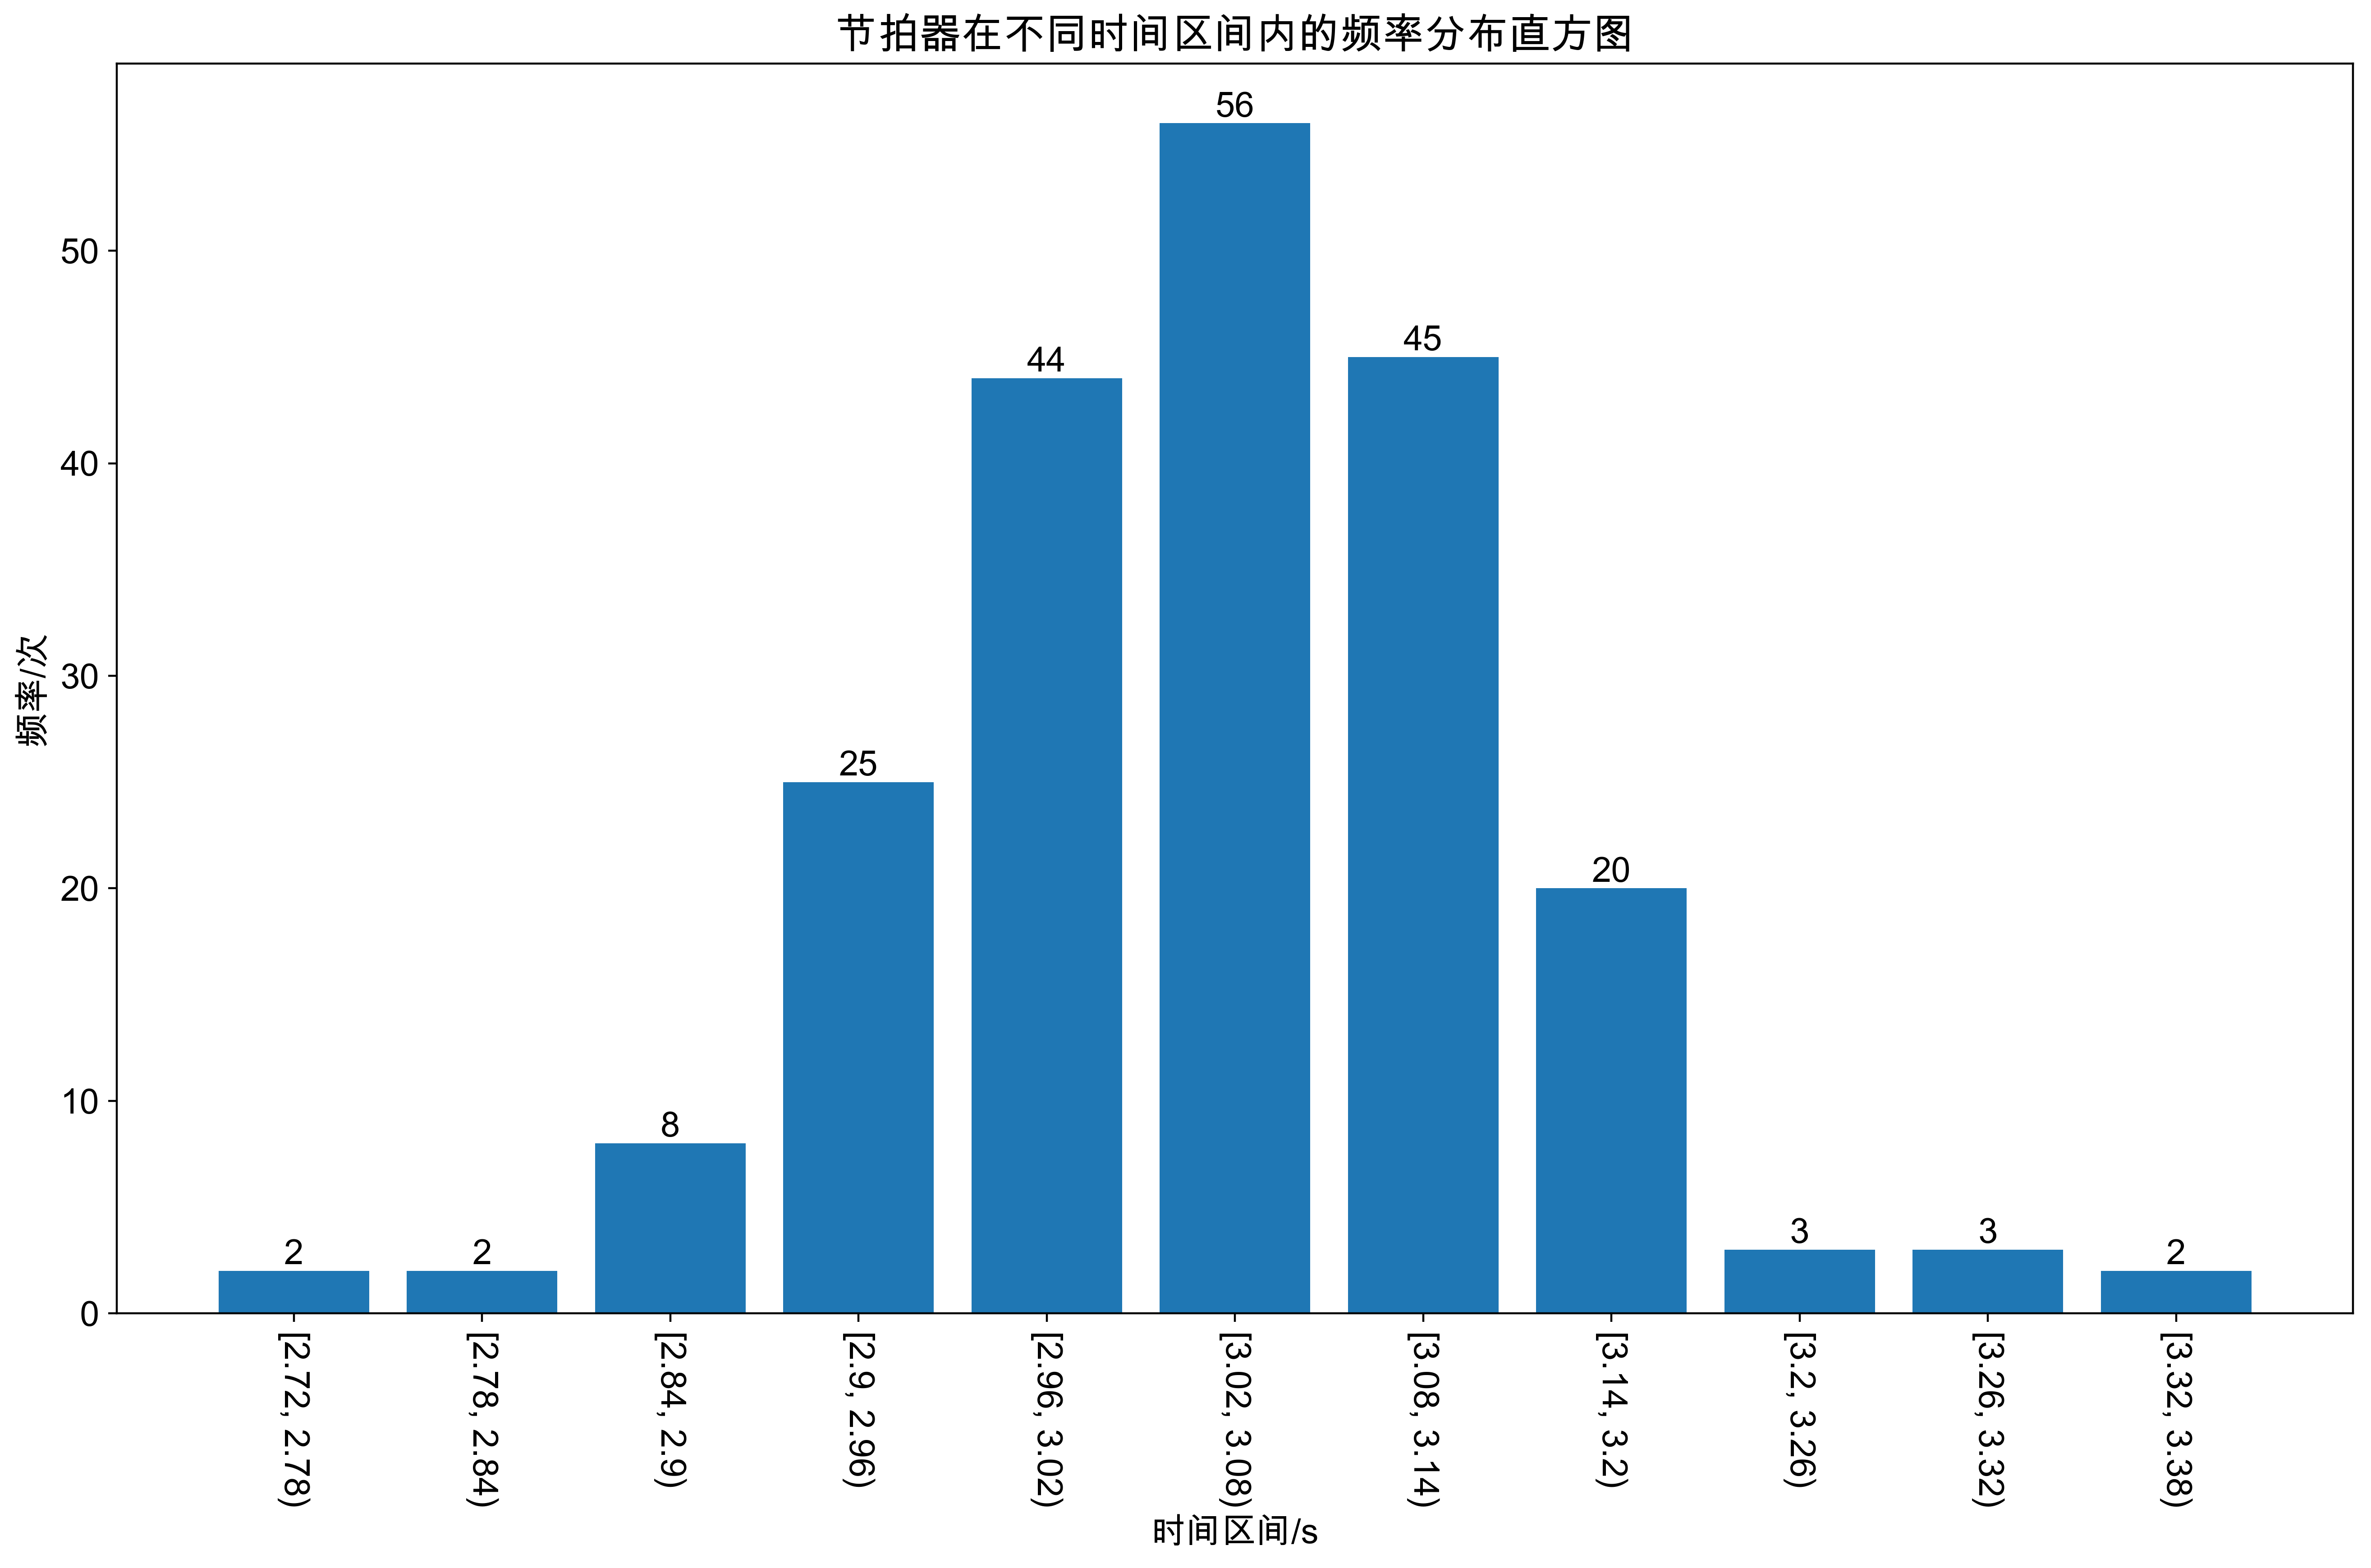

In [9]:
x_label = getXLabels(rel_freq.frequency.size)
plt.figure(figsize=(16, 9), dpi=400)
plt.xticks(rotation=270)
plt.title("节拍器在不同时间区间内的频率分布直方图")
plt.xlabel("时间区间/s")
plt.ylabel("频率/次")
bar = plt.bar(x = x_label, 
        height = rel_freq.frequency * 210)
plt.bar_label(bar)
plt.show()

In [10]:
lhs = float(data.min().iloc[0])
normal_args = sts.norm.fit(data)

In [11]:
cdf_normal = [sts.norm.cdf(
                        lhs + (i + 1)*delta, *normal_args)
              - sts.norm.cdf(lhs + i * delta, *normal_args)
              for i in range(10)]

In [12]:
x_left = [lhs + i * delta for i in range(K)]
x_middle = [lhs + (i + 0.5) * delta for i in range(K)]

In [13]:
strs = [str(np.round(i, 4)) for i in cdf_normal]

In [14]:
pdf_norm = sts.norm.pdf(x_middle, *normal_args).reshape((-1, ))

print("正态分布在区间中点的函数值：", pdf_norm)

正态分布在区间中点的函数值： [0.12066206 0.50687899 1.46475049 2.91171466 3.98161966 3.74538554
 2.42358963 1.07881615 0.33034033 0.06958274 0.01008248]


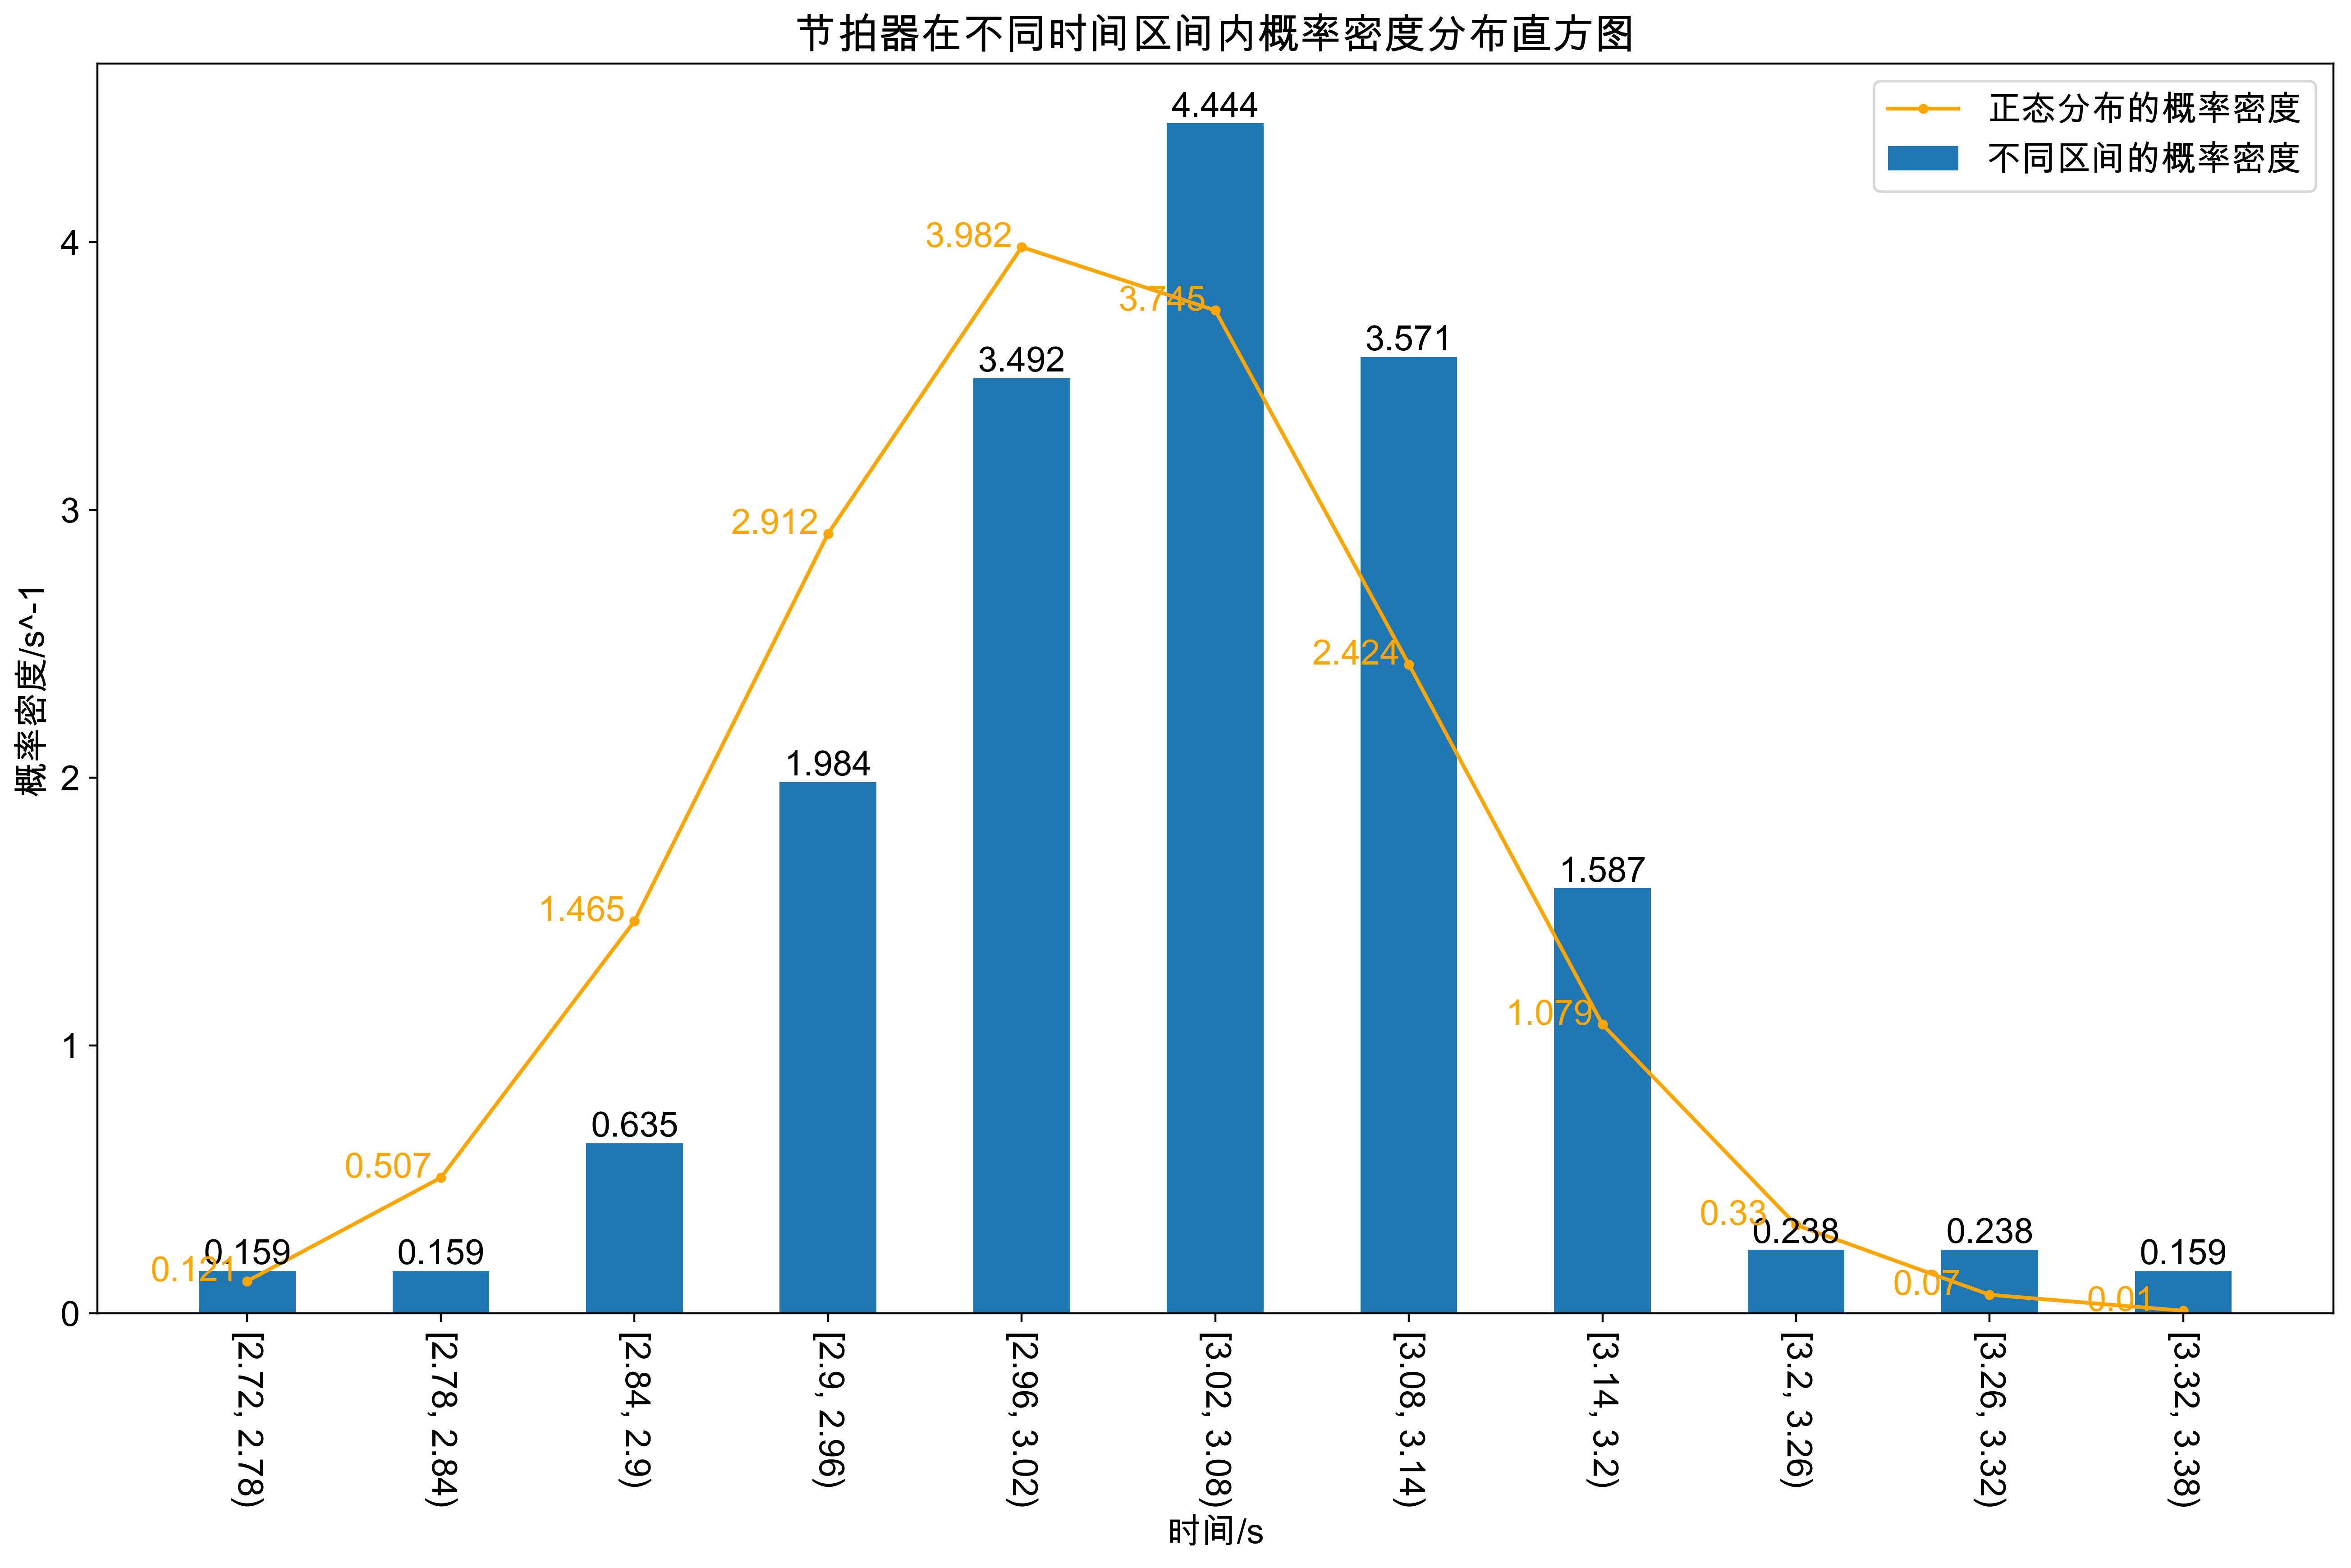

In [15]:
plt.figure(figsize=(16, 9), dpi=400)

plt.xticks(ticks=x_middle, labels=getXLabels(K), rotation=270)
plt.title("节拍器在不同时间区间内概率密度分布直方图")
plt.xlabel("时间/s")
plt.ylabel("概率密度/s^-1")

height = rel_freq.frequency.reshape((-1, ))

bar = plt.bar(x = x_middle, height = np.round(rel_freq.frequency/rel_freq.binsize, 3), 
        width=0.5 * delta,
        label='不同区间的概率密度')

plt.bar_label(bar, label_type='edge')

plt.plot(x_middle, pdf_norm, marker='.', label='正态分布的概率密度',
         color='orange')

for i in range(K):
    plt.text(x_left[i], pdf_norm[i], 
             np.round(pdf_norm[i], 3), color='orange')
    

plt.legend()
plt.show()

## 1.4 实验内容

### 统计不同置信区间内的概率

In [16]:
P_1 = 0
P_2 = 0
P_3 = 0

for i in range(K):
    x_lhs = rel_freq.lowerlimit + i * rel_freq.binsize
    pi = rel_freq.frequency[i]
    if(x_lhs >= mu - sigma 
       and x_lhs <= mu + sigma):
        P_1 += pi
        P_2 += pi
        P_3 += pi
    elif(x_lhs >= mu - 2 * sigma 
         and x_lhs <= mu + 2 * sigma):
        P_2 += pi 
        P_3 += pi 
    elif(x_lhs >= mu - 3 * sigma
         and x_lhs <= mu + 3 * sigma):
        P_3 += pi
    

print("sigma, 2 sigma, 3 sigma 区间内的概率分别是", P_1, P_2, P_3)

sigma, 2 sigma, 3 sigma 区间内的概率分别是 0.6904761904761905 0.919047619047619 0.9904761904761903
